In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
df = pd.read_csv('Global_COVID_Vaccination_Tracker.csv')
df

,Countries and regions,Doses administered,Enough for % of people,Percentage of population with 1+ dose,Percentage of population fully vaccinated,Daily rate of doses administered
0,Global Total,5.663213e+09,NaN,NaN,NaN,33380378.0
1,Mainland China,2.129833e+09,76.1,NaN,69.3,6454714.0
2,India,7.303371e+08,26.7,40.3,12.4,7616167.0
3,EU,5.469671e+08,61.6,66.0,61.5,1394444.0
4,U.S.,3.785697e+08,59.2,62.9,53.6,721844.0
...,...,...,...,...,...,...
202,Nauru,1.479000e+04,56.9,58.6,55.2,NaN
203,St. Helena,7.892000e+03,65.8,72.7,58.9,8.0
204,Falkland Islands,4.407000e+03,73.5,87.7,59.2,202.0
205,Montserrat,2.837000e+03,28.4,29.3,27.4,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Countries and regions                      207 non-null    object 
 1   Doses administered                         206 non-null    float64
 2   Enough for % of people                     202 non-null    float64
 3   Percentage of population with 1+ dose      200 non-null    float64
 4   Percentage of population fully vaccinated  197 non-null    float64
 5   Daily rate of doses administered           203 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.8+ KB


In [13]:
df.isna().sum()

Countries and regions                         0
Doses administered                            1
Enough for % of people                        5
Percentage of population with 1+ dose         7
Percentage of population fully vaccinated    10
Daily rate of doses administered              4
dtype: int64

In [14]:
df.columns

Index(['Countries and regions', 'Doses administered', 'Enough for % of people',
       'Percentage of population with 1+ dose',
       'Percentage of population fully vaccinated',
       'Daily rate of doses administered'],
      dtype='object')

In [15]:
df.mean(axis = 0)

Doses administered                           5.763783e+07
Enough for % of people                       3.559505e+01
Percentage of population with 1+ dose        3.966600e+01
Percentage of population fully vaccinated    3.194061e+01
Daily rate of doses administered             3.357373e+05
dtype: float64

In [17]:
df['Doses administered'].fillna(value=df['Doses administered'].mean(), inplace=True)
df['Enough for % of people'].fillna(value=df['Enough for % of people'].mean(), inplace=True)
df['Percentage of population with 1+ dose'].fillna(value=df['Percentage of population with 1+ dose'].mean(), inplace=True)
df['Percentage of population fully vaccinated'].fillna(value=df['Percentage of population fully vaccinated'].mean(), inplace=True)
df['Daily rate of doses administered'].fillna(value=df['Daily rate of doses administered'].mean(), inplace=True)

In [18]:
df.head(5)

,Countries and regions,Doses administered,Enough for % of people,Percentage of population with 1+ dose,Percentage of population fully vaccinated,Daily rate of doses administered
0,Global Total,5.663213e+09,35.59505,39.666,31.940609,33380378.0
1,Mainland China,2.129833e+09,76.10000,39.666,69.300000,6454714.0
2,India,7.303371e+08,26.70000,40.300,12.400000,7616167.0
3,EU,5.469671e+08,61.60000,66.000,61.500000,1394444.0
4,U.S.,3.785697e+08,59.20000,62.900,53.600000,721844.0


<AxesSubplot:>

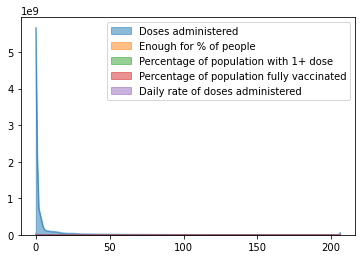

In [19]:
df.plot.area(stacked=False)

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

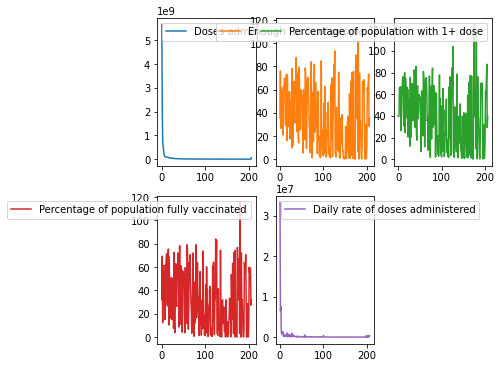

In [24]:
df.plot(subplots=True, layout=(2, 3), figsize=(6, 6), sharex=False)

In [27]:
india = df[df['Countries and regions']=='India']
india

,Countries and regions,Doses administered,Enough for % of people,Percentage of population with 1+ dose,Percentage of population fully vaccinated,Daily rate of doses administered
2,India,730337116.0,26.7,40.3,12.4,7616167.0


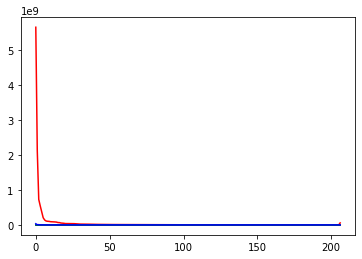

In [30]:
plt.figure()

with pd.plotting.plot_params.use("x_compat", True):
    df["Doses administered"].plot(color="r")
    df["Enough for % of people"].plot(color="g")
    df["Percentage of population with 1+ dose"].plot(color="b")
    df["Percentage of population fully vaccinated"].plot(color="g")
    df["Daily rate of doses administered"].plot(color="b")

<AxesSubplot:>

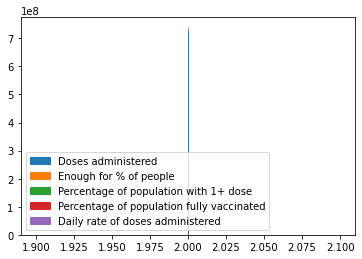

In [31]:
india.plot.area()

In [40]:
df.rename({'Countries and regions': 'location', 'Percentage of population fully vaccinated': '%_population_fully_vaccinated'}, axis=1, inplace=True)
df

,location,Doses administered,Enough for % of people,Percentage of population with 1+ dose,%_population_fully_vaccinated,Daily rate of doses administered
0,Global Total,5.663213e+09,35.59505,39.666,31.940609,3.338038e+07
1,Mainland China,2.129833e+09,76.10000,39.666,69.300000,6.454714e+06
2,India,7.303371e+08,26.70000,40.300,12.400000,7.616167e+06
3,EU,5.469671e+08,61.60000,66.000,61.500000,1.394444e+06
4,U.S.,3.785697e+08,59.20000,62.900,53.600000,7.218440e+05
...,...,...,...,...,...,...
202,Nauru,1.479000e+04,56.90000,58.600,55.200000,3.357373e+05
203,St. Helena,7.892000e+03,65.80000,72.700,58.900000,8.000000e+00
204,Falkland Islands,4.407000e+03,73.50000,87.700,59.200000,2.020000e+02
205,Montserrat,2.837000e+03,28.40000,29.300,27.400000,3.357373e+05


In [61]:
def plot_net_conv(scope,title):
 fig = px.choropleth(
 df,
 locations ="location",
 color ="Percentage of population with 1+ dose",
 hover_name ="%_population_fully_vaccinated",
 scope=scope,
 color_continuous_scale='RdYlGn',
 animation_frame ="Enough for % of people")
 
 fig.update_layout(title_text=title,
 font_family="Rockwell",
 title_font_size=20,
 coloraxis_colorbar=dict(
 title='Percentage of population fully vaccinated'))
 
 fig.show()

In [62]:
plot_net_conv('world','Percentage of population fully vaccinated')

In [54]:
ind = df[df['location']=='India']
ind

,location,Doses administered,Enough for % of people,Percentage of population with 1+ dose,%_population_fully_vaccinated,Daily rate of doses administered
2,India,730337116.0,26.7,40.3,12.4,7616167.0


In [58]:
def plot_net_conv(scope,title):
 fig = px.choropleth(
 ind,
 locations ="location",
 color ="Percentage of population with 1+ dose",
 hover_name ="%_population_fully_vaccinated",
 scope=scope,
 color_continuous_scale='RdYlGn',
 animation_frame ="Daily rate of doses administered")
 
 fig.update_layout(title_text=title,
 font_family="Rockwell",
 title_font_size=20,
 coloraxis_colorbar=dict(
 title='Percentage of population fully vaccinated'))
 
 fig.show()

In [60]:
plot_net_conv('asia','Percentage of population fully vaccinated in India')